# Контрольна робота, Варіант №20, Бараніченко Андрій, КА-95

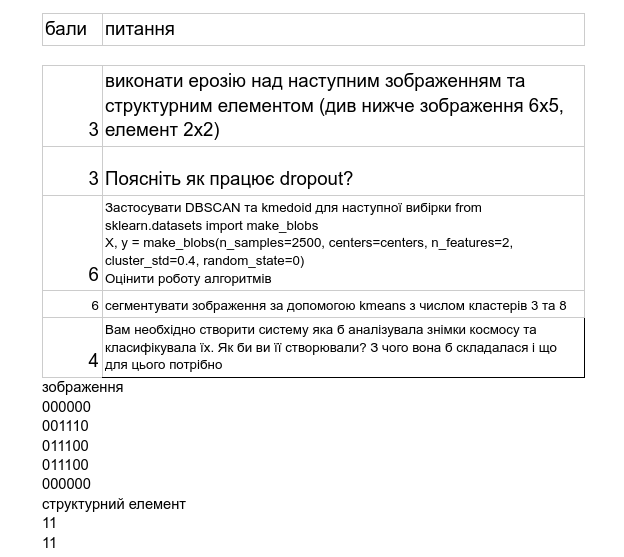

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Завдання №1

In [2]:
img = np.zeros((5,6))
img[1:-1, 1:-2] = 1
img[1,1] =0
img[1,-2]=1
img = img.astype(int)
img

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [3]:
structure_element = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
structure_element

array([[1, 1],
       [1, 1]], dtype=uint8)

In [4]:
img = img.astype(np.uint8)
img_eroded = cv2.erode(img, structure_element, iterations=1)
img_eroded

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

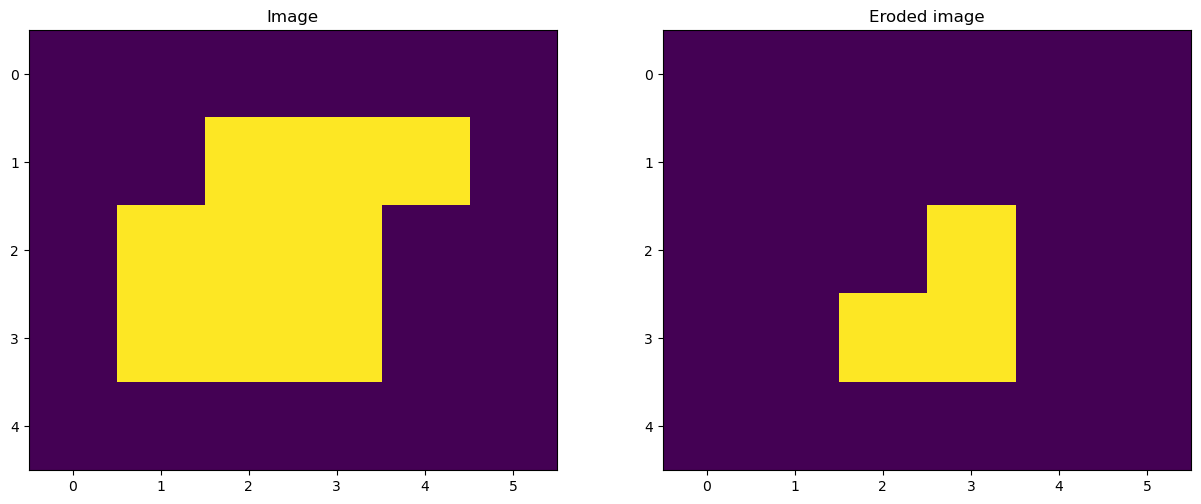

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Eroded image')
plt.imshow(img_eroded)

## Завдання №2

Головна ідея Dropout – замість навчання однієї глибокої нейронної мережі (Deep Neural Network, DNN) навчити ансамбль кількох DNN, а потім усереднити отримані результати.

Мережі для навчання виходять за допомогою виключення з мережі (dropping out) нейронів з ймовірністю $p$, таким чином, ймовірність того, що нейрон залишиться в мережі, становить $q=1-p$ (імовірність виключення/вимкнення кожного нейрона однакова). "Виключення" нейрона означає, що при будь-яких вхідних даних або параметрах він повертає 0.

Виключені нейрони не роблять свій внесок у процес навчання на жодному з етапів алгоритму зворотного поширення помилки (backpropagation); тому виключення хоча б одного з нейронів рівносильне навчанню нової нейронної мережі.

У стандартній нейронній мережі похідна, отримана кожним параметром, повідомляє йому, як він повинен змінитися, щоб, враховуючи діяльність інших блоків, мінімізувати функцію кінцевих втрат. Тому блоки можуть змінюватися, виправляючи помилки інших блоків. Це може призвести до надмірної спільної адаптації, що, у свою чергу, призводить до перенавчання, оскільки ці спільні адаптації неможливо узагальнити на дані, які не брали участь у навчанні. Тобто, Dropout запобігає сумісній адаптації для кожного прихованого блоку, роблячи присутність інших прихованих блоків ненадійною. Тому прихований блок не може покладатися на інші блоки у виправленні помилок.

Dropout запобігає взаємоадаптації нейронів на етапі навчання.

## Завдання №3

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import (silhouette_score,
                                     adjusted_rand_score, adjusted_mutual_info_score,
                                     v_measure_score)

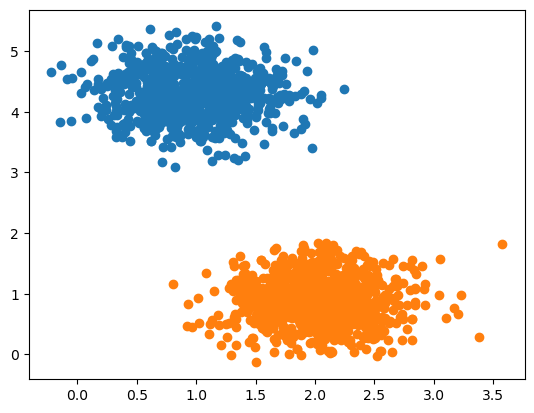

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2500, centers=3, n_features=2, cluster_std=0.4, random_state=0)
# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

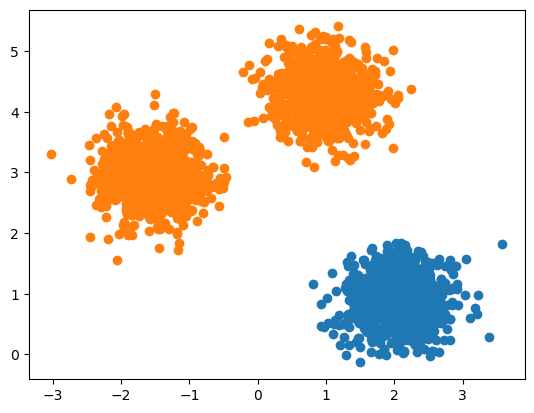

0.0
The average silhouette_score is : 0.6268796010651968
ARand: 0.5710856750706903
V: 0.7336130223688968
MI: 0.7334900233996353


In [8]:
from sklearn_extra.cluster import KMedoids
kmedoid = KMedoids(n_clusters=2, random_state=0).fit(X)
km_predict=kmedoid.predict(X)
# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(km_predict == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()
a_km = accuracy_score(y, km_predict)
print(a_km)
silhouette_avg = silhouette_score(X, km_predict)
print("The average silhouette_score is :", silhouette_avg)
ad=adjusted_rand_score(y,km_predict)
print("ARand:", ad)
v_measure_score
v=v_measure_score(y,km_predict)
print("V:", v)
a=adjusted_mutual_info_score(y,km_predict)
print("MI:", a)

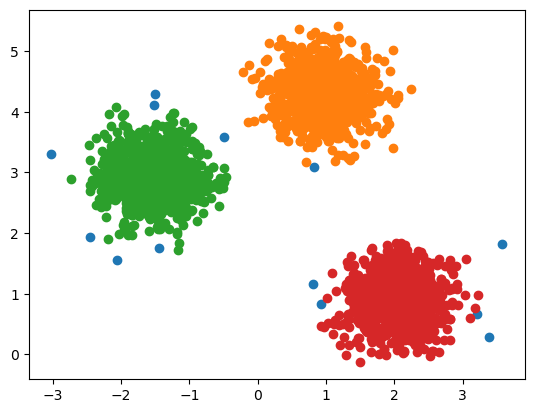

0.3332
The average silhouette_score is : 0.7482052970106643
ARand: 0.9921962285788989
V: 0.9837433206606507
MI: 0.9837253459111113


In [9]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)
Label = model.fit_predict(X)
clusters = np.unique(Label)
for cluster in clusters:
    row_ix = np.where(Label == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()
a_ac = accuracy_score(y, Label)
print(a_ac)
silhouette_avg = silhouette_score(X, Label)
print("The average silhouette_score is :", silhouette_avg)
ad=adjusted_rand_score(y,Label)
print("ARand:", ad)
v_measure_score
v=v_measure_score(y,Label)
print("V:", v)
a=adjusted_mutual_info_score(y,Label)
print("MI:", a)

Можемо бачити, що DBSCAN спрацював краще за KMedoids. 

## Завдання 4

In [10]:
def plot_kmeans(image, clusters):
    vectorized = image.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = clusters
    attempts = 10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((image.shape))
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()

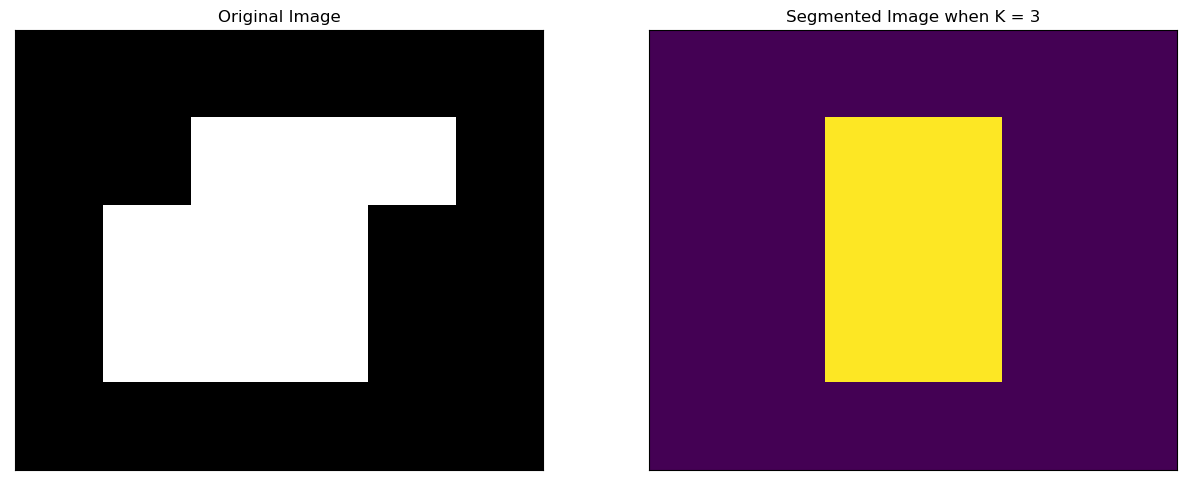

In [11]:
plot_kmeans(img, 3)

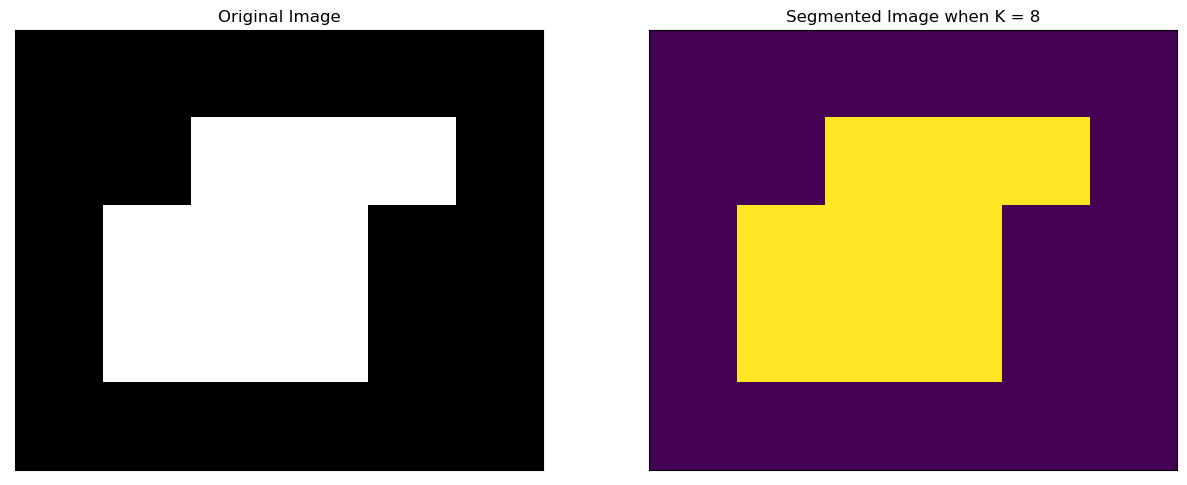

In [12]:
plot_kmeans(img, 8)

## Завдання №5 

Щоб з картою було легше працювати, треба розмітить багатокутниками об'єкти: ліси, водойми, вулиці, будинки і т.д. Цим зазвичай займаються спеціалісти-картографи, але технології комп'ютерного зору дозволяють з певною точністю робити це все за допомогою машини/комп'ютеру. Для цієї задачі цілком згодяться бібліотека OpenCV для задач комп'ютерного зору та нейронні мережі, наприклад, Tensorflow.

Для вирішення цієї задачі можна натренувати нейронну мережу, яка б займалась сегментацією, тобто визначенням відношення кожної точки на спутниковому зображені до будівлі. Отримавши маску за спутниковим зображенням, ми виділимо достатньо великі скупчення точок, які належать будівлям, зберемо їх в зв'язні області і представимо границі областей у векторній формі в вигляді багатокутників. Зрозуміло, що маска не буде абсолютно точною, а значить будівлі, які стоять близько можуть зклеятись в одну зв'язну область. Тому додатково мережа може відшукати ребра (границі дому) і розділити будівлі, які зклеялись. Те саме можна проробити з іншими об'єктами. 